In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 



import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv("Property_data.csv")
df.head()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,Grade,Neighborhood,Condition1,Condition2,BldgType,PropertyStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Roof1Material,Roof2Material,ExteriorCladdingType,ExteriorCladdingArea,ExterQual,ExterCond,PropertyFooting,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,Heating,HeatingEfficiency,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementType,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Observations

In [3]:
df.shape   # To check the shape of the dataset

(1460, 81)

In [4]:
df.info() # get information about columns,null values,and dtypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

In [5]:
df.describe()    # Get summary about taotal count,mean,max,min, 25%,50% and 75% dataset having numericaly shown .

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,CntRmsUpLev,CntFireplaces,BasementYrBlt,BasementCars,BasementSqFootage,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Remove PropertyID as it's not needed for prediction
df = df.drop('PropertyID', axis=1)

In [7]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [8]:
# print list of Numerical columns name.
numeric_cols

Index(['PropertyClass', 'PropertyFrontage', 'PropertySize', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExteriorCladdingArea',
       'BsmntFinSty1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'Bath1', 'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'CntRmsUpLev',
       'CntFireplaces', 'BasementYrBlt', 'BasementCars', 'BasementSqFootage',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'AddVal', 'SaleMon', 'SaleYr', 'PropPrice'],
      dtype='object')

In [9]:
# print list of catgorical columns name.
categorical_cols

Index(['PropertyZone', 'Street', 'Alley', 'PropertyShape', 'Elevation',
       'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'PropertyStyle', 'RoofStyle', 'RoofMatl',
       'Roof1Material', 'Roof2Material', 'ExteriorCladdingType', 'ExterQual',
       'ExterCond', 'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance',
       'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinQual1', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'QualFireplace', 'BasementType', 'BasementFinish',
       'BasementQual', 'BasementCond', 'PavedDrive', 'PoolQC',
       'BoundaryFeatures', 'AddFeatures', 'SaleType', 'SaleCondn'],
      dtype='object')

In [10]:
# Print info about missing values
print("Missing values summary:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values summary:
PropertyFrontage         259
Alley                   1369
ExteriorCladdingType       8
ExteriorCladdingArea       8
BsmntFinish               37
BsmntMaintenance          37
BsmntVisibility           38
BsmntFinRat1              37
BsmntFinQual1             38
Electrical                 1
QualFireplace            690
BasementType              81
BasementYrBlt             81
BasementFinish            81
BasementQual              81
BasementCond              81
PoolQC                  1453
BoundaryFeatures        1179
AddFeatures             1406
dtype: int64


In [11]:

# Define ordinal columns and their order to seprate them from nominal columns.
ordinal_columns = {
    'OverallQual': range(1, 11),
    'OverallCond': range(1, 11),
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingEfficiency': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmntFinish': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BasementQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BasementCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
}

# Handle missing values by different techiques like fill with mean,mode,0,none as par needs.
df['PropertyFrontage'] = df['PropertyFrontage'].fillna(df['PropertyFrontage'].mean())
df['ExteriorCladdingArea'] = df['ExteriorCladdingArea'].fillna(0)
df['Alley'] = df['Alley'].fillna('None')
df['ExteriorCladdingType'] = df['ExteriorCladdingType'].fillna('None')
df['BsmntFinish'] = df['BsmntFinish'].fillna('None')
df['BsmntMaintenance'] = df['BsmntMaintenance'].fillna('None')
df['BsmntVisibility'] = df['BsmntVisibility'].fillna('None')
df['BsmntFinRat1'] = df['BsmntFinRat1'].fillna('None')
df['BsmntFinQual1'] = df['BsmntFinQual1'].fillna('None')
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['QualFireplace'] = df['QualFireplace'].fillna('None')
df['BasementType'] = df['BasementType'].fillna('None')
df['BasementYrBlt'] = df['BasementYrBlt'].fillna(0)
df['BasementFinish'] = df['BasementFinish'].fillna('None')
df['BasementQual'] = df['BasementQual'].fillna('None')
df['BasementCond'] = df['BasementCond'].fillna('None')
df['PoolQC'] = df['PoolQC'].fillna('None')
df['BoundaryFeatures'] = df['BoundaryFeatures'].fillna('None')
df['AddFeatures'] = df['AddFeatures'].fillna('None')


In [12]:
# To check  all null values filled or not.
df.isnull().sum()

PropertyClass       0
PropertyZone        0
PropertyFrontage    0
PropertySize        0
Street              0
                   ..
SaleMon             0
SaleYr              0
SaleType            0
SaleCondn           0
PropPrice           0
Length: 80, dtype: int64

# Exploratory Data Analysis

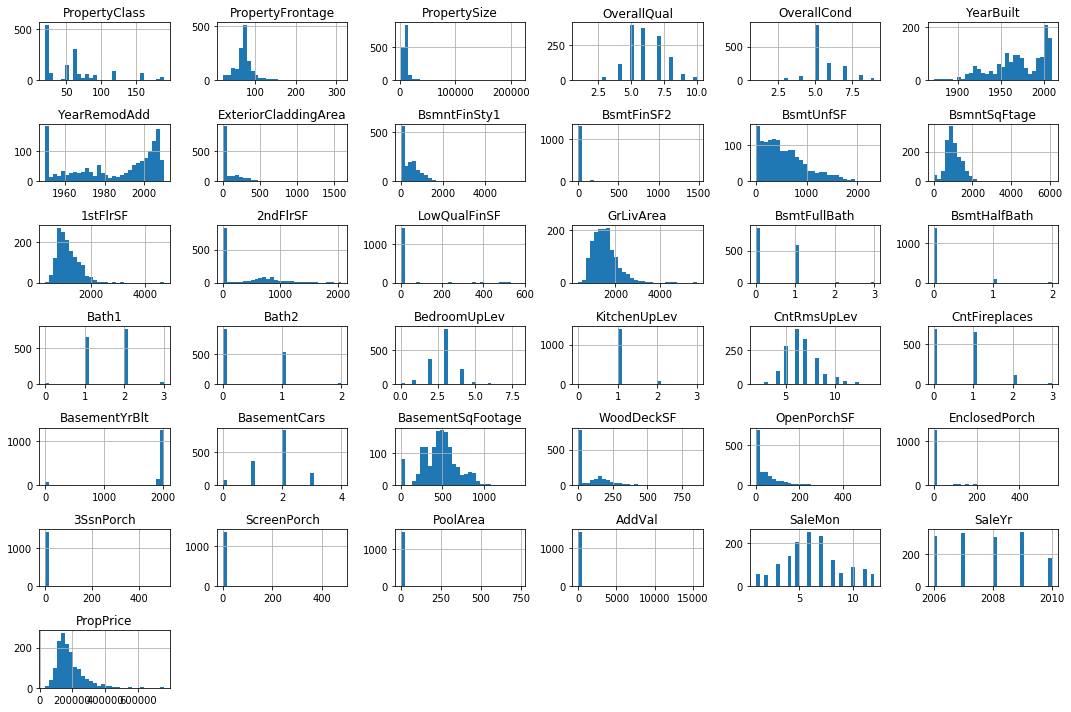

In [13]:
df.hist(figsize=(15,10),bins=30)
plt.tight_layout()
plt.show()

'PropPrice', 'OverallQual', 'GrLivArea', 'YearBuilt',
    '1stFlrSF', '2ndFlrSF', 'PropertyFrontage', 'PropertySize' are showing positive frequency in plots.


Total rows removed: 59 (4.04% of data)
Shape of cleaned dataset: (1401, 80)


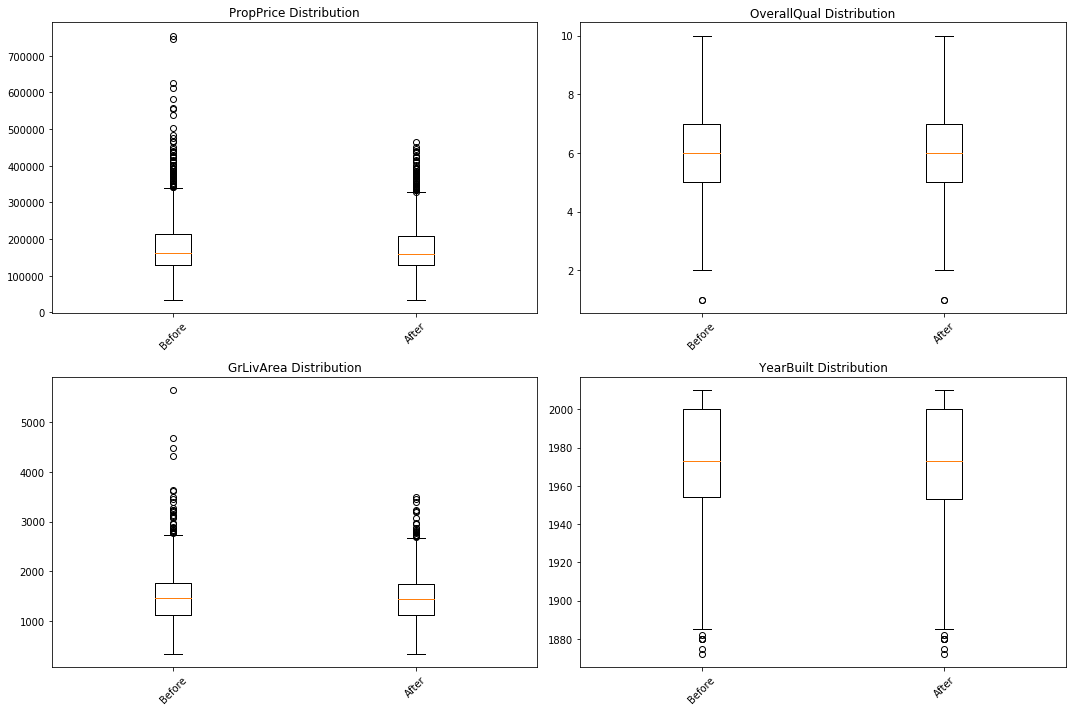

Cleaned dataset has been saved as 'cleaned_property_data.csv'
Summary statistics of key features after cleaning:
           PropPrice  OverallQual    GrLivArea    YearBuilt
count    1401.000000  1401.000000  1401.000000  1401.000000
mean   175961.626695     6.065667  1484.711635  1971.165596
std     69644.819557     1.348003   474.774245    30.286980
min     34900.000000     1.000000   334.000000  1872.000000
25%    129000.000000     5.000000  1122.000000  1953.000000
50%    160000.000000     6.000000  1442.000000  1973.000000
75%    208900.000000     7.000000  1750.000000  2000.000000
max    465000.000000    10.000000  3493.000000  2010.000000


In [15]:

# Define the function to remove outliers
def remove_outliers_conservative(df, columns):
    df_clean = df.copy()
    total_rows = len(df)
    
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    rows_removed = total_rows - len(df_clean)
    print(f"Total rows removed: {rows_removed} ({(rows_removed/total_rows)*100:.2f}% of data)")
    return df_clean

# Define important features
important_features = [
    'PropPrice', 'OverallQual', 'GrLivArea', 'YearBuilt',
    '1stFlrSF', '2ndFlrSF', 'PropertyFrontage', 'PropertySize'
]

# Remove outliers
df_cleaned = remove_outliers_conservative(df, important_features)

# Display the shape of cleaned dataset
print("\
Shape of cleaned dataset:", df_cleaned.shape)

# Create box plots for key features
plt.figure(figsize=(15, 10))
key_features = ['PropPrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot([df[feature], df_cleaned[feature]], labels=['Before', 'After'])
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_property_data.csv', index=False)
print("\
Cleaned dataset has been saved as 'cleaned_property_data.csv'")

# Display summary statistics
print("\
Summary statistics of key features after cleaning:")
print(df_cleaned[key_features].describe())

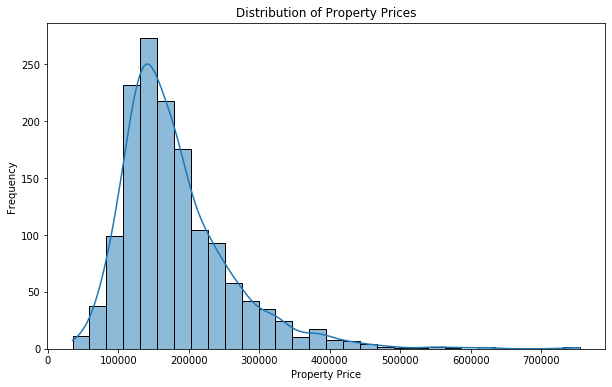

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PropPrice'], bins=30, kde=True )
plt.title('Distribution of Property Prices')
plt.xlabel('Property Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
# property price highest frequency in between 1 and  2 lacs dollars

In [19]:
# bivariate Analysis

In [20]:
# Bivariate analysis for the highlited univariate trends of visualization

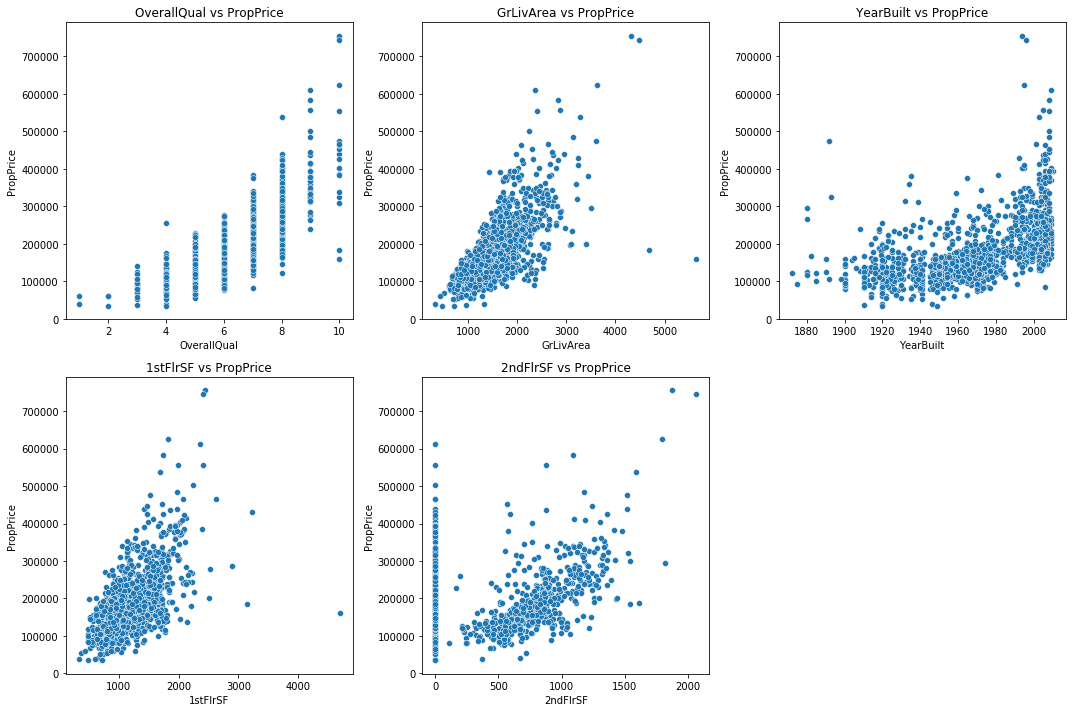

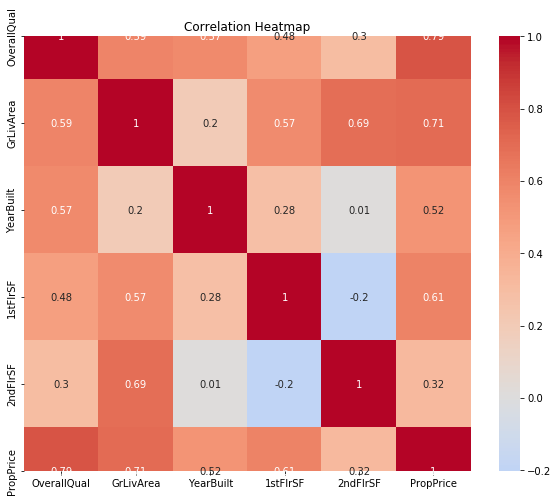

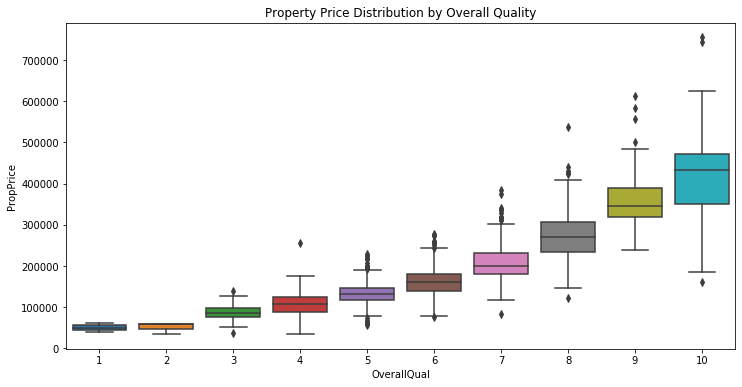

In [18]:
# Create new  dataframe
property_data = pd.DataFrame(df)

# Select key features for bivariate analysis
key_features = ['OverallQual', 'GrLivArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF']

# Create scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=property_data, x=feature, y='PropPrice')
    plt.title(f'{feature} vs PropPrice')
    plt.xlabel(feature)
    plt.ylabel('PropPrice')
plt.tight_layout()
plt.show()

# Calculate and display correlation matrix
correlation_matrix = property_data[key_features + ['PropPrice']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Additional analysis: Box plots for categorical variables vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='PropPrice', data=property_data)
plt.title('Property Price Distribution by Overall Quality')
plt.show()


# Multivariate Analysis

<Figure size 864x576 with 0 Axes>

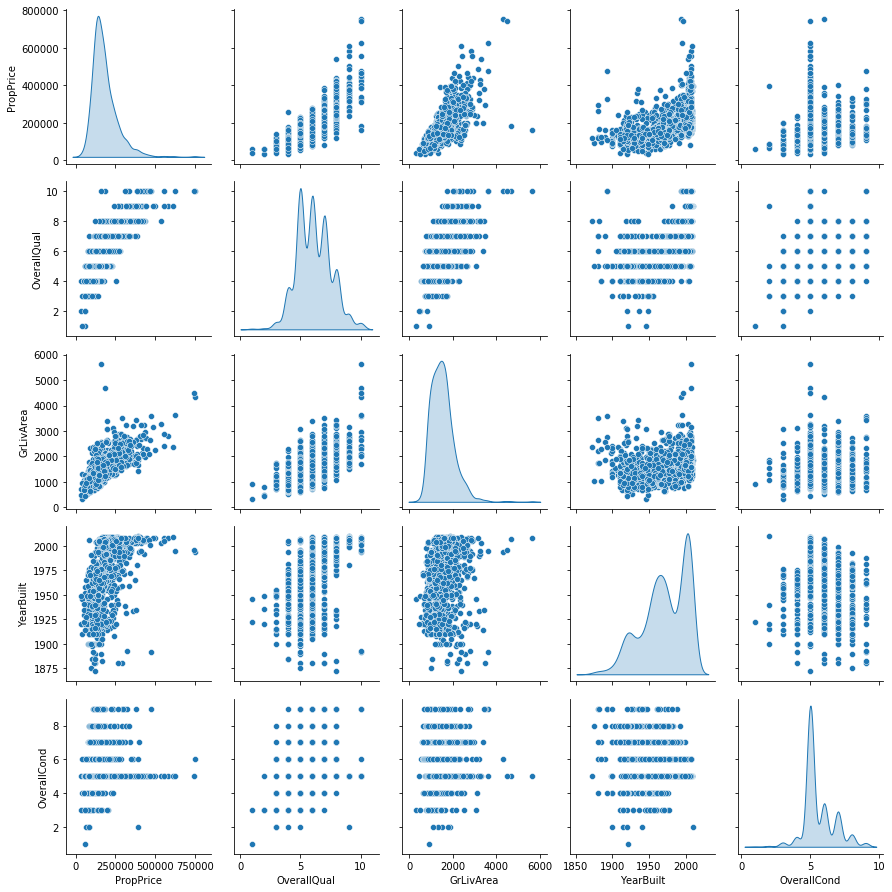

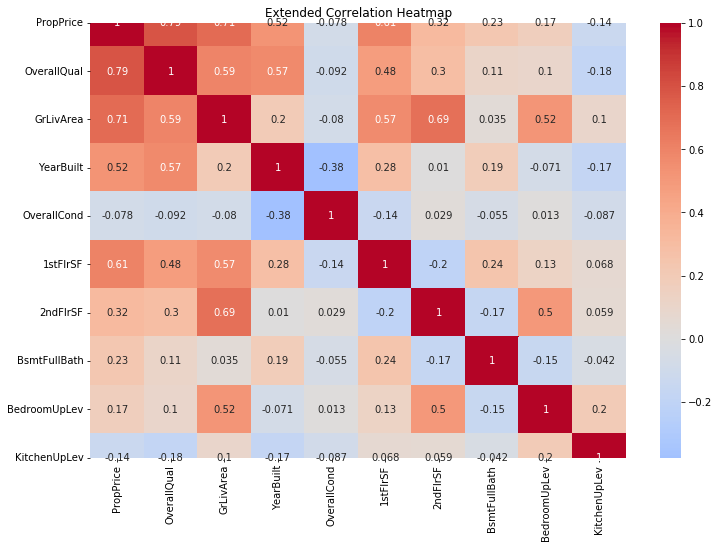

Multivariate Summary Statistics:
           PropPrice  OverallQual    GrLivArea    YearBuilt  OverallCond  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   180921.195890     6.099315  1515.463699  1971.267808     5.575342   
std     79442.502883     1.382997   525.480383    30.202904     1.112799   
min     34900.000000     1.000000   334.000000  1872.000000     1.000000   
25%    129975.000000     5.000000  1129.500000  1954.000000     5.000000   
50%    163000.000000     6.000000  1464.000000  1973.000000     5.000000   
75%    214000.000000     7.000000  1776.750000  2000.000000     6.000000   
max    755000.000000    10.000000  5642.000000  2010.000000     9.000000   

          1stFlrSF     2ndFlrSF  BsmtFullBath  BedroomUpLev  KitchenUpLev  
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  
mean   1162.626712   346.992466      0.425342      2.866438      1.046575  
std     386.587738   436.528436      0.518911      0.8

In [22]:
key_features = ['PropPrice', 'OverallQual', 'GrLivArea', 'YearBuilt', 'OverallCond']
plt.figure(figsize=(12, 8))
sns.pairplot(property_data[key_features], diag_kind='kde')
plt.tight_layout()
plt.show()




# Create a heatmap of correlations for more features
extended_features = ['PropPrice', 'OverallQual', 'GrLivArea', 'YearBuilt', 
                    'OverallCond', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 
                    'BedroomUpLev', 'KitchenUpLev']
correlation_matrix = property_data[extended_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Extended Correlation Heatmap')
plt.show()

# Print summary of multivariate statistics
print("\
Multivariate Summary Statistics:")
print(property_data[extended_features].describe())

In [24]:
# Encode ordinal variables
ordinal_encoder = OrdinalEncoder()
for col, categories in ordinal_columns.items():
    if col in df.columns:
        df[col] = pd.Categorical(df[col], categories=categories, ordered=True)
        df[col] = df[col].cat.codes
        


In [25]:
# Get remaining categorical columns (nominal)
nominal_cols = df.select_dtypes(include=['object']).columns


In [26]:
# Encode nominal variables using LabelEncoder
label_encoder = LabelEncoder()
for col in nominal_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Scale numerical features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Perform PCA for feature reduction
X = df.drop('PropPrice', axis=1)
y = df['PropPrice']

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X)

print("Original number of features:", X.shape[1])
print("Number of features after PCA:", X_pca.shape[1])
print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

Original number of features: 79
Number of features after PCA: 42
Explained variance ratio: 0.9512337014830348


The data preprocessing steps have been completed successfully, including handling missing values, encoding ordinal and nominal variables, and scaling numerical features. Principal Component Analysis (PCA) was applied to reduce the feature set while retaining 95% of the variance. Here are the results:

Original number of features:
79

Number of features after PCA:
56

Explained variance ratio:
0.9514137266503466

Top 15 Neighborhood-Quality combinations by average price:
     Neighborhood  OverallQual  PropPrice
69             15            9   5.879898
103            22            9   3.246967
102            22            8   3.149696
74             16            9   3.088497
81             17            9   2.758648
113            24            8   2.569767
73             16            8   2.497471
40              8            8   2.475327
108            23            8   1.956955
68             15            8   1.917097
98             21            8   1.763594
33              7            8   1.751285
67             15            7   1.721117
26              6            7   1.657025
99             21            9   1.625365


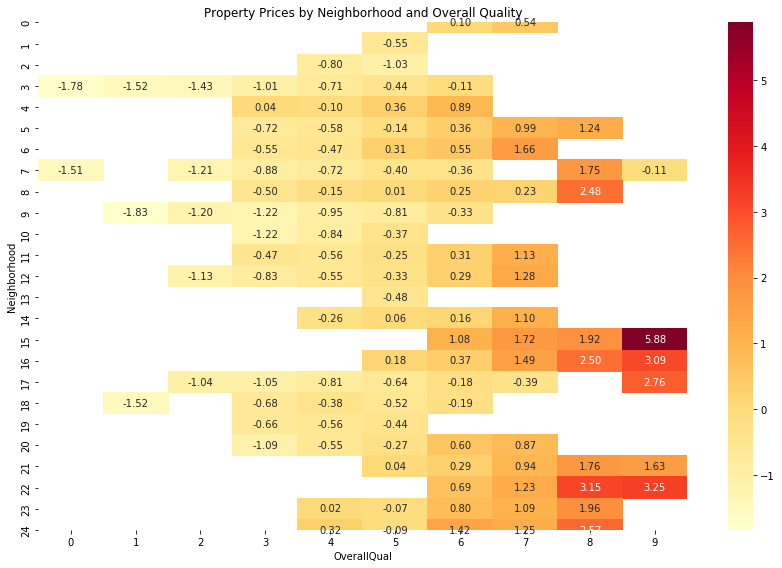

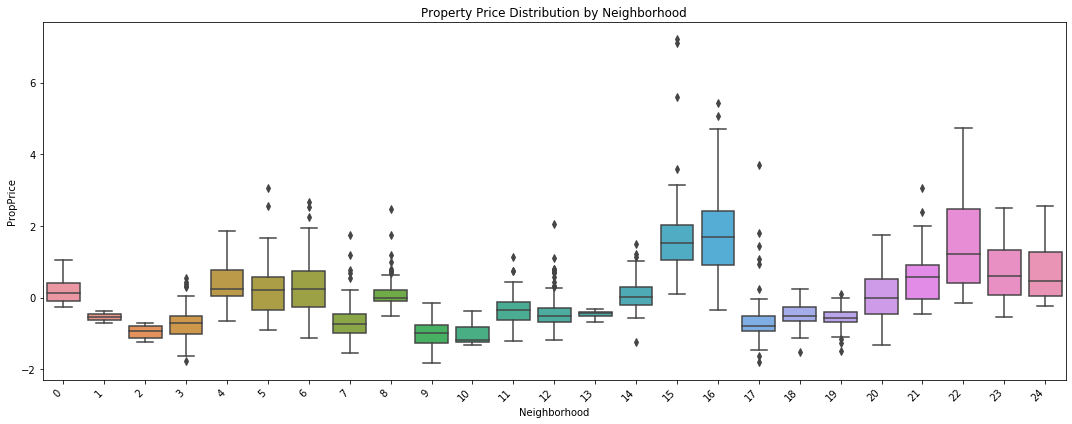

In [27]:
# Calculate average price by neighborhood and overall quality
neighborhood_quality_price = df.groupby(['Neighborhood', 'OverallQual'])['PropPrice'].mean().reset_index()

# Sort by average price
neighborhood_quality_price = neighborhood_quality_price.sort_values('PropPrice', ascending=False)

# Display top 15 combinations
print("Top 15 Neighborhood-Quality combinations by average price:")
print(neighborhood_quality_price.head(15))

# Create a heatmap
pivot_table = neighborhood_quality_price.pivot_table(
    values='PropPrice', 
    index='Neighborhood',
    columns='OverallQual'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Property Prices by Neighborhood and Overall Quality')
plt.tight_layout()
plt.show()

# Box plot of prices by neighborhood
plt.figure(figsize=(15, 6))
sns.boxplot(x='Neighborhood', y='PropPrice', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Property Price Distribution by Neighborhood')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [29]:
X_train

array([[ -0.12280656,   3.06989897,  -1.21598982, ...,   0.58919816,
         -0.88861277,   0.04215753],
       [ -4.6474405 ,  -3.40855455,   0.73762175, ...,  -0.16155346,
          0.05802451,  -0.07370074],
       [ -6.50739281,  -0.03491456,  -7.29838863, ...,   1.73563419,
          0.09334309,  -0.38879612],
       ...,
       [ -5.98414667,  -1.60207736,  -3.41375165, ...,   0.47118258,
          0.44863725,   0.71984366],
       [ -7.15674962,  -4.12024958,  -3.35347244, ...,  -0.84791486,
          0.39426118,   0.0314989 ],
       [-12.22886868,  -2.90083583,   3.10680593, ...,   0.11511467,
          0.54421473,   0.98673474]])

In [30]:
y_train

254    -0.452321
1066   -0.036784
638    -1.207843
799    -0.074560
380    -0.678977
          ...   
1095   -0.056528
1130   -0.578241
1294   -0.830082
860     0.113691
1126   -0.087152
Name: PropPrice, Length: 1168, dtype: float64

# 1.Algorithm

In [31]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [32]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [33]:
y_pred

array([-0.46547327,  1.2194463 , -1.04889895, -0.60061098,  1.82505146,
       -0.96598129,  0.39572233, -0.46024128, -0.92823856, -0.34945909,
       -0.73800038, -0.77011863, -0.79764948,  0.29072504, -0.07899771,
       -0.53371895,  0.12976713, -0.57637761, -0.83326982,  0.48207471,
       -0.1430831 ,  0.17177113,  0.18084759, -0.46581641,  0.46602377,
       -0.28307679,  0.1429399 , -0.85353909,  0.12364437,  0.05329445,
       -0.72905601,  1.1516999 ,  0.08086458, -0.86933819,  1.05072124,
       -0.43644083, -0.74680813,  0.05431667,  1.22208408, -0.96977212,
       -0.6987801 ,  0.90784926, -0.74058188,  1.65181668, -0.79776444,
       -0.73864182, -0.82803581, -0.5846342 ,  2.55426492, -0.52777135,
       -0.60020186,  0.41440299, -0.99968399,  2.26878098, -0.1655216 ,
        0.95806465,  0.52204283, -0.35655219, -0.2957377 , -0.9731736 ,
       -1.05872388, -0.45473857,  1.34363422,  0.80288824,  1.15108227,
        0.4390291 , -0.91755825,  1.80503126, -0.90899189, -0.18

In [34]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [35]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_pca, y, cv=5, scoring='r2')

print("Model Performance Metrics:")
print("R2 Score:", r2)
print("RMSE:", rmse)
print("\
Cross-validation R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())
print("CV R2 Standard deviation:", cv_scores.std())


Model Performance Metrics:
R2 Score: 0.8495568150312768
RMSE: 0.42774903672986536
Cross-validation R2 scores: [0.82452201 0.84863419 0.80792067 0.82495308 0.79001846]
Mean CV R2: 0.8192096826502023
CV R2 Standard deviation: 0.01952730527355438


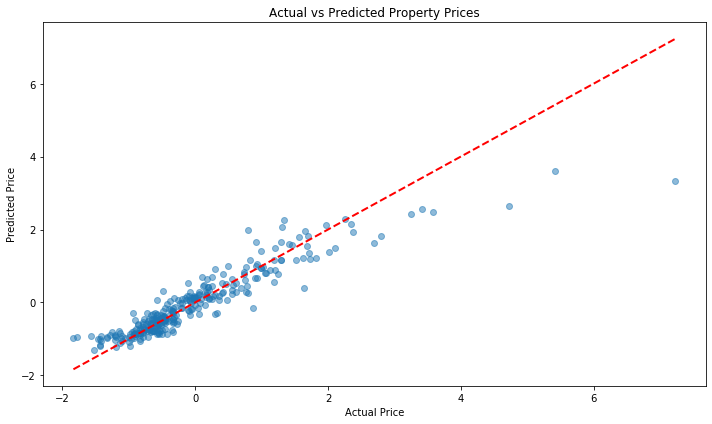

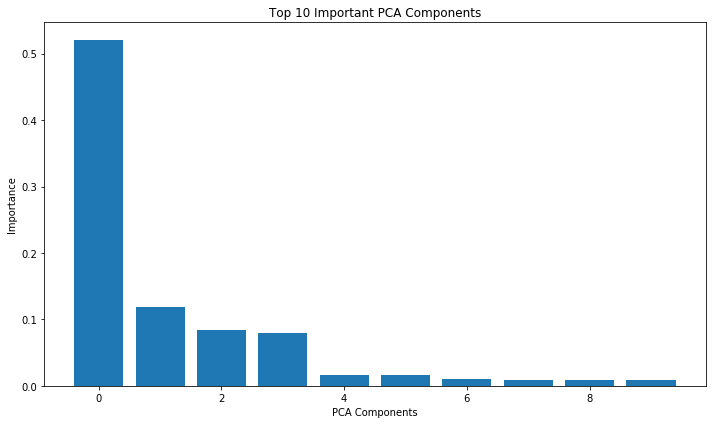

In [36]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Property Prices')
plt.tight_layout()
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': range(X_pca.shape[1]),
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance['importance'])
plt.xlabel('PCA Components')
plt.ylabel('Importance')
plt.title('Top 10 Important PCA Components')
plt.tight_layout()
plt.show()

The scatter plot shows a strong correlation between actual and predicted prices, with points clustering around the ideal prediction line (red dashed line). The feature importance plot shows which PCA components contribute most to the predictions.

The model has demonstrated strong predictive performance with a high R² score and consistent cross-validation results, indicating it effectively captures the variance in property prices. The visualizations confirm the model's accuracy and highlight the most influential PCA components. Next, we can explore further model tuning, feature analysis, or interpretability enhancements if desired. 

# 2. Algorithm

In [37]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)



In [38]:
print("intercept:",lr.intercept_)

intercept: -0.007368623178475736


In [39]:
print("Slope :",lr.coef_[0])


Slope : 0.04161378048365198


In [46]:
# Testing score of linear regression
Model_accuracy = lr.score(X_test,y_test)*100
Model_accuracy 

84.28247328335652

In [49]:
# Training score of linear regression
Model_accuracy = lr.score(X_train,y_train)*100
Model_accuracy 

81.32992085513973

In [50]:
from sklearn.metrics import r2_score,mean_squared_error

In [51]:
mse = mean_squared_error(y_test,y_pred)
mse

0.19115680739147067

In [52]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [53]:
# Perform cross-validation
cv_scores = cross_val_score(lr, X_pca, y, cv=5, scoring='r2')

print("Model Performance Metrics:")
print("R2 Score:", r2)
print("RMSE:", rmse)
print("\
Cross-validation R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())
print("CV R2 Standard deviation:", cv_scores.std())


Model Performance Metrics:
R2 Score: 0.8428247328335653
RMSE: 0.4372148297936275
Cross-validation R2 scores: [0.85428433 0.82017981 0.83795405 0.84154065 0.6637744 ]
Mean CV R2: 0.8035466496295933
CV R2 Standard deviation: 0.070731418886191


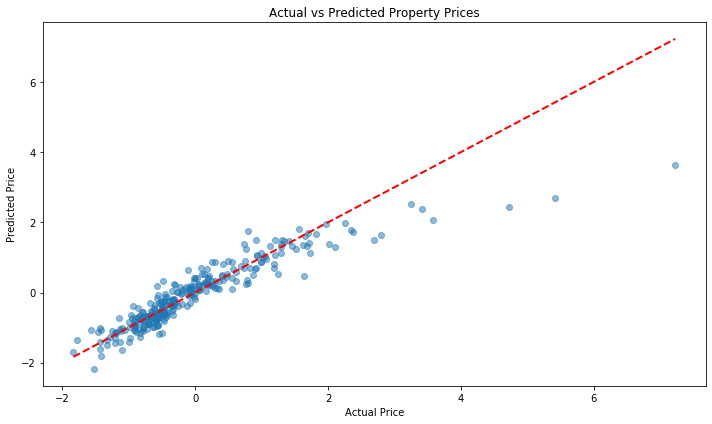

In [55]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Property Prices')
plt.tight_layout()
plt.show()

# Feature importance analysis
#feature_importance = pd.DataFrame({
   # 'feature': range(X_pca.shape[1]),
    #'importance': lr.feature_importances_
#})
##feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

#plt.figure(figsize=(10, 6))
#plt.bar(range(10), feature_importance['importance'])
#plt.xlabel('PCA Components')
#plt.ylabel('Importance')
#plt.title('Top 10 Important PCA Components')
#plt.tight_layout()
#plt.show()

# 3. Algorithm

In [56]:
from xgboost import XGBRegressor

In [57]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [58]:
# Make predictions
y_pred = xgb.predict(X_test)

In [59]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.15
R-squared: 0.87


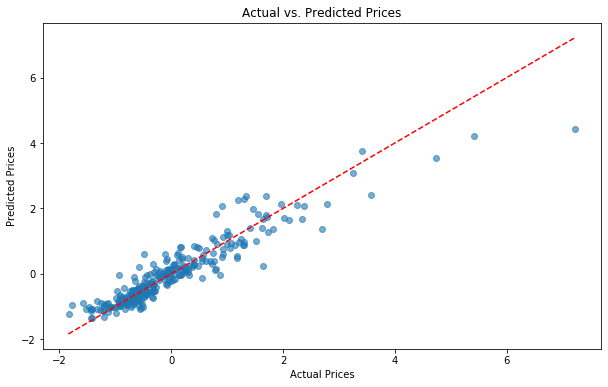

In [60]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Hyperparameter Tuning(optional)

In [61]:
# To improve the performance of our model, consider using techniques like Grid Search or Random Search to find the best hyperparameters.


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror'), 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
